In [8]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Load the MNIST dataset (handwritten digits)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create a neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")


Epoch 1/5
750/750 [==============================] - 7s 7ms/step - loss: 0.3316 - accuracy: 0.9081 - val_loss: 0.1792 - val_accuracy: 0.9484
Epoch 2/5
750/750 [==============================] - 6s 7ms/step - loss: 0.1503 - accuracy: 0.9569 - val_loss: 0.1364 - val_accuracy: 0.9601
Epoch 3/5
750/750 [==============================] - 5s 7ms/step - loss: 0.1052 - accuracy: 0.9687 - val_loss: 0.1068 - val_accuracy: 0.9695
Epoch 4/5
750/750 [==============================] - 6s 8ms/step - loss: 0.0799 - accuracy: 0.9764 - val_loss: 0.1030 - val_accuracy: 0.9701
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0882 - accuracy: 0.9725
Test accuracy: 0.9725000262260437


1/1 [==============================] - 0s 100ms/step


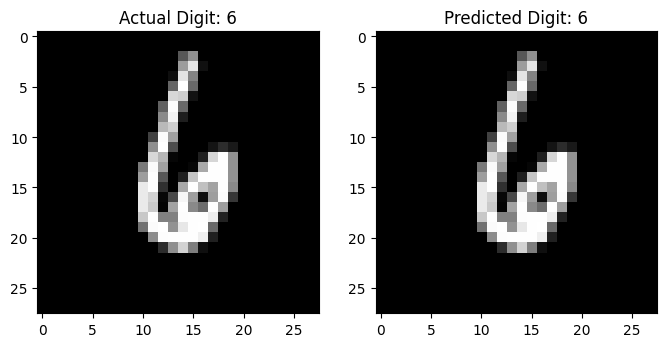

Prediction is correct!


In [6]:
import matplotlib.pyplot as plt

# Choose a random test image to predict
random_test_index = np.random.randint(0, len(test_images))
random_test_image = test_images[random_test_index]
actual_digit = np.argmax(test_labels[random_test_index])

# Reshape the image and make a prediction
prediction = model.predict(np.expand_dims(random_test_image, axis=0))
predicted_digit = np.argmax(prediction)

# Display the actual digit image and the predicted digit
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(random_test_image.reshape(28, 28), cmap='gray')
plt.title(f"Actual Digit: {actual_digit}")
plt.subplot(1, 2, 2)
plt.imshow(random_test_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()

# Print the result
if actual_digit == predicted_digit:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")